# Lending Club Case Study

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading Input Data

In [4]:
# Reading input Loan Data file 
loandf = pd.read_csv("loan.csv")

In [5]:
#Reading Data first 10 records
loandf.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Understanding Structure of Data

In [6]:
#Understand the dimension of data. No.of columns and Rows
loandf.shape

(39717, 111)

In [7]:
# Types of data in Loan data
loandf.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [8]:
# Information of loan data. 
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning

In [10]:
#Identify number of records having null information
loandf.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [11]:
loandf.shape

(39717, 111)

In [12]:
#Drop columns having all NA values
loandf.dropna(axis=1, how='all', inplace=True)

In [13]:
# Columns having all NA Values are dropped. Check new dimensions of Data
loandf.shape

(39717, 57)

In [20]:
#Verify amount of null values in each column
loandf.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [14]:
#drop columns in which nan data is very high (>50%)
loandf.drop(labels=['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1, inplace=True)
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [15]:
#verify duplicate rows
loandf.duplicated().sum()

0

In [19]:
loandf.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [20]:
loandf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [27]:
loandf["desc"]

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              210
Debt Consolidation                                                                                                                                                                                                                                                                                                                                    

In [21]:
# Drop desc column as the values are text and dont contribute to analysis
loandf.drop(columns=['desc'], inplace=True)
loandf.shape

(39717, 53)

In [22]:
loandf["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [23]:
#Remove Rows with Loan status as current as its still running loans and cant be used for analysis
loandf = loandf[~(loandf['loan_status'] == 'Current')]

In [25]:
loandf["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [26]:
#Check for null values again 
loandf.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2386
emp_length                    1033
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [27]:
loandf["title"].describe()

count                  38566
unique                 19297
top       Debt Consolidation
freq                    2090
Name: title, dtype: object

In [28]:
# Title is also Text column which has lot of unique values. Drop the column
loandf.drop(columns=['title'],inplace=True)
loandf.shape

(38577, 52)

In [29]:
loandf.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [30]:
loandf.nunique().sort_values()

tax_liens                         1
initial_list_status               1
out_prncp                         1
out_prncp_inv                     1
collections_12_mths_ex_med        1
policy_code                       1
pymnt_plan                        1
application_type                  1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                

In [121]:
#Subset the Loan Data by removing Behavioural Data columns and columns that have unique values 
loandfNew = loandf[['id', #'member_id'
              'loan_amnt', 'funded_amnt', 'funded_amnt_inv','term', 'int_rate', 'installment', 'grade',
              'sub_grade',
              'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
               'issue_d', 'loan_status', #'pymnt_plan', 
               # 'url',
                'purpose', 'zip_code',
               'addr_state', 'dti', # 'delinq_2yrs', 'earliest_cr_line',
               'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
               'total_acc', #'initial_list_status', 'out_prncp', 'out_prncp_inv',
               #'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
               #'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
               #'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
               #'collections_12_mths_ex_med', #'policy_code', 'application_type',
               #'acc_now_delinq', #'chargeoff_within_12_mths', 'delinq_amnt',
               'pub_rec_bankruptcies', #'tax_liens'
                ]]

In [122]:
loandfNew.shape

(38577, 27)

In [123]:
loandfNew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  object 
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_title             36191 non-null  object 
 10  emp_length            37544 non-null  object 
 11  home_ownership        38577 non-null  object 
 12  annual_inc            38577 non-null  float64
 13  verification_status   38577 non-null  object 
 14  issue_d               38577 non-null  object 
 15  loan_status           38

In [124]:
loandfNew.nunique().sort_values()

loan_status                 2
term                        2
verification_status         3
pub_rec_bankruptcies        3
pub_rec                     5
home_ownership              5
grade                       7
inq_last_6mths              9
emp_length                 11
purpose                    14
sub_grade                  35
open_acc                   40
addr_state                 50
issue_d                    55
total_acc                  82
int_rate                  370
zip_code                  822
loan_amnt                 870
funded_amnt              1019
revol_util               1088
dti                      2853
annual_inc               5215
funded_amnt_inv          8050
installment             15022
revol_bal               21275
emp_title               28027
id                      38577
dtype: int64

In [125]:
loandfNew.isnull().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2386
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [126]:
loandfNew.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,860xx,AZ,27.65,1,3,0,13648,83.70%,9,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,309xx,GA,1.00,5,3,0,1687,9.40%,4,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,606xx,IL,8.72,2,2,0,2956,98.50%,10,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,917xx,CA,20.00,1,10,0,5598,21%,37,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,852xx,AZ,11.20,3,9,0,7963,28.30%,12,0.0


In [127]:
loandfNew.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

## Handling Missing values
 - Missing values are present in "emp_length", "revol_util".
 - Check if mode(emp_len) and frequency of emp_len is higher to replace the missing values with mode()

In [128]:
print("Mode : " + loandfNew['emp_length'].mode()[0])
loandfNew['emp_length'].value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [129]:
loandfNew['emp_length'].fillna(loandfNew['emp_length'].mode()[0], inplace = True)
loandfNew['emp_length'].isna().sum()

0

### Standardize values
Below four columns can be categorized as continuous variables, hence converting them into int/float case to case:
1. revol_util: Standardise this value by trimming off % and convert to numeric value.
2. int_rate: Standardise this value by trimming off % and convert to numeric value.
3. term: Standardise this value by trimming off 'months' and convert to numeric value.
4. emp_length: Standardise this value by trimming off 'years' and convert to numeric value. <1 year is treated as 0 and 10+ years is treated as 10.

In [130]:
loandfNew['revol_util'] = loandfNew['revol_util'].apply(lambda x : str(x))
loandfNew['revol_util'] = loandfNew['revol_util'].apply(lambda x : float(0) if not x else float(x.split('%')[0]))

In [131]:
loandfNew['int_rate'] = loandfNew['int_rate'].apply(lambda x : str(x))
loandfNew['int_rate'] = loandfNew['int_rate'].apply(lambda x : float(0) if not x else float(x.split('%')[0]))

In [132]:
loandfNew['term'] = loandfNew['term'].apply(lambda x : str(x))
loandfNew['term'] = loandfNew['term'].apply(lambda x : int(0) if not x else int(x.split('months')[0]))

In [134]:
loandfNew['emp_length'] = loandfNew['emp_length'].apply(lambda x : str(x))
loandfNew['emp_length'] = loandfNew['emp_length'].apply(lambda x: int(0) if "<" in x else (int((x.split('+')[0])) if "+" in x else int(x.split()[0])))

In [138]:
loandfNew.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,zip_code,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,...,860xx,AZ,27.65,1,3,0,13648,83.7,9,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,...,309xx,GA,1.00,5,3,0,1687,9.4,4,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,...,606xx,IL,8.72,2,2,0,2956,98.5,10,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,917xx,CA,20.00,1,10,0,5598,21.0,37,0.0
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,...,852xx,AZ,11.20,3,9,0,7963,28.3,12,0.0


### Check for outliers in each of the columns with continuous variables
Checking for below columns:
- annual_inc
- dti
- loan_amnt
- funded_amnt_inv

<Axes: >

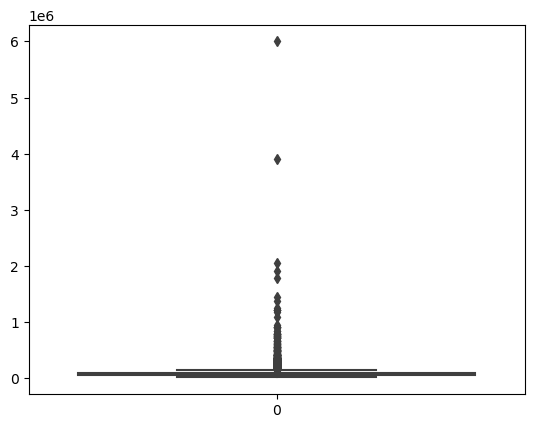

In [139]:
# Outlier check for annual_inc
sns.boxplot(loandfNew['annual_inc'])

In [142]:
loandfNew['annual_inc'].quantile([0.5, 0.75, 0.90, 0.95, 0.96, 0.97, 0.98, 0.99])

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.96    150000.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

<Axes: >

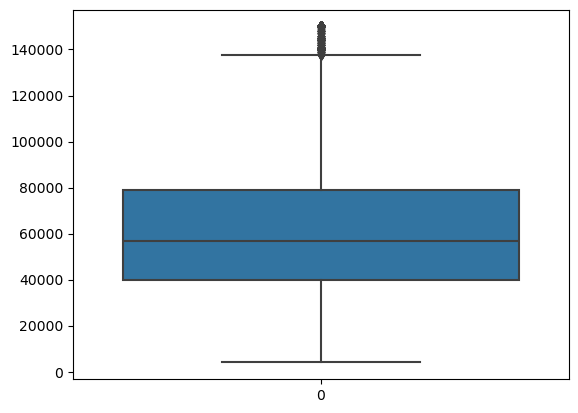

In [143]:
# Data above 96th percentile looks to be outliers, hence removing them and replotting again.
loandfNew = loandfNew[loandfNew['annual_inc'] <= loandfNew['annual_inc'].quantile(0.96)]
sns.boxplot(loandfNew['annual_inc'])

<Axes: >

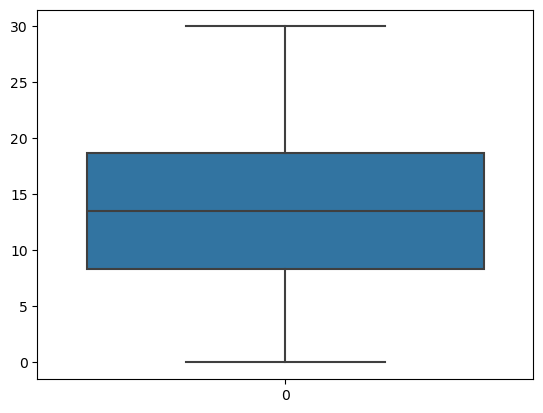

In [144]:
# Outlier check for dti
sns.boxplot(loandfNew['dti'])

In [145]:
# Clearly no outliers observed in 'dti' column.

<Axes: >

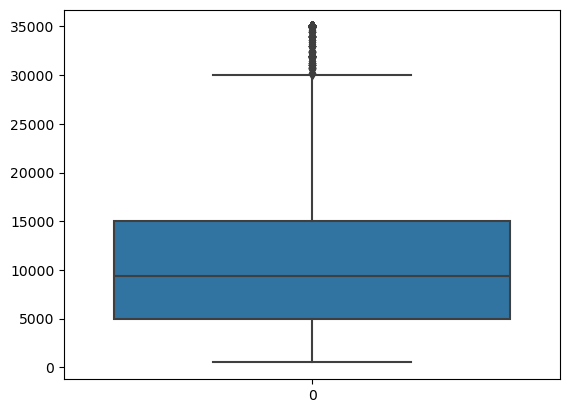

In [146]:
# Outlier check for loan_amnt
sns.boxplot(loandfNew['loan_amnt'])

In [147]:
# loan_amnt data looks to be continous, hence, not taking any action here.

<Axes: >

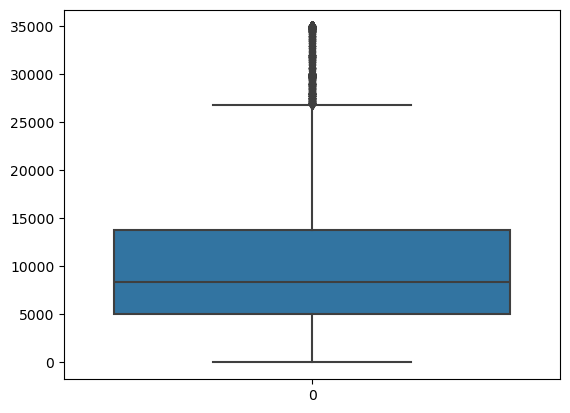

In [148]:
# Outlier check for funded_amnt_inv
sns.boxplot(loandfNew['funded_amnt_inv'])

In [149]:
# funded_amnt_inv data looks to be continous, hence, not taking any action here.

In [150]:
loandfNew.shape

(37091, 27)